
# Ishigami function

The ishigami function is a non-linear, non-monotonic function that is commonly used to 
benchmark uncertainty and senstivity analysis methods.

\begin{align}f(x_1, x_2, x_3) = sin(x_1) + a \cdot sin^2(x_2) + b \cdot x_3^4 sin(x_1)\end{align}

\begin{align}x_1, x_2, x_3 \sim \mathcal{U}(-\pi, \pi), \quad a, b\in \mathbb{R}\end{align}

## First order Sobol indices

\begin{align}S_1 = \frac{V_1}{\mathbb{V}[Y]}, \quad S_2 = \frac{V_2}{\mathbb{V}[Y]}, \quad S_3 = \frac{V_3}{\mathbb{V}[Y]} = 0,\end{align}

\begin{align}V_1 = 0.5 (1 + \frac{b\pi^4}{5})^2, \quad V_2 = \frac{a^2}{8}, \quad V_3 = 0\end{align}

\begin{align}\mathbb{V}[Y] = \frac{a^2}{8} + \frac{b\pi^4}{5} + \frac{b^2\pi^8}{18} + \frac{1}{2}\end{align}

## Total order Sobol indices

\begin{align}S_{T_1} = \frac{V_{T1}}{\mathbb{V}[Y]}, \quad S_{T_2} = \frac{V_{T2}}{\mathbb{V}[Y]}, \quad S_{T_3} = \frac{V_{T3}}{\mathbb{V}[Y]}\end{align}

\begin{align}V_{T_1} = 0.5 (1 + \frac{b\pi^4}{5})^2 + \frac{8b^2\pi^8}{225}, \quad V_{T_2}= \frac{a^2}{8}, \quad V_{T_3} = \frac{8b^2\pi^8}{225}\end{align}

\begin{align}\mathbb{V}[Y] = \frac{a^2}{8} + \frac{b\pi^4}{5} + \frac{b^2\pi^8}{18} + \frac{1}{2}\end{align}


In [1]:
import numpy as np

from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Uniform
from UQpy.distributions.collection.JointIndependent import JointIndependent
from UQpy.sensitivity.SobolSensitivity import SobolSensitivity
from UQpy.sensitivity.PostProcess import *

np.random.seed(123)

**Define the model and input distributions**



Create Model object



In [2]:
model = PythonModel(
    model_script="local_ishigami.py",
    model_object_name="evaluate",
    var_names=["$X_1$", "$X_2$", "$X_3$"],
    delete_files=True,
    params=[7, 0.1],
)

runmodel_obj = RunModel(model=model)

# Define distribution object
dist_object = JointIndependent([Uniform(-np.pi, 2 * np.pi)] * 3)

**Compute Sobol indices**



In [3]:
SA = SobolSensitivity(runmodel_obj, dist_object)

SA.run(n_samples=100_000, n_bootstrap_samples=100)

**First order Sobol indices**

Expected first order Sobol indices:

$S_1$ = 0.3139

$S_2$ = 0.4424

$S_3$ = 0.0



In [4]:
SA.first_order_indices

array([[0.31339349],
       [0.44400385],
       [0.00169028]])

**Total order Sobol indices**

Expected total order Sobol indices:

$S_{T_1}$ = 0.55758886

$S_{T_2}$ = 0.44241114

$S_{T_3}$ =  0.24368366



In [5]:
SA.total_order_indices

array([[0.56253533],
       [0.44018882],
       [0.25000686]])

**Confidence intervals for first order Sobol indices**



In [7]:
SA.first_order_confidence_interval

array([[ 0.30681375,  0.31997324],
       [ 0.43846748,  0.44954022],
       [-0.00487084,  0.00825139]])

**Confidence intervals for total order Sobol indices**



In [9]:
SA.total_order_confidence_interval

array([[0.55107695, 0.57399372],
       [0.42867433, 0.4517033 ],
       [0.23948522, 0.2605285 ]])

**Plot the first order sensitivity indices**



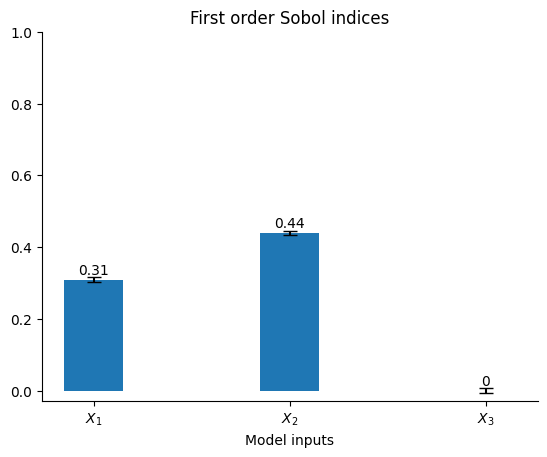

In [8]:
fig1, ax1 = plot_sensitivity_index(
    SA.first_order_indices[:, 0],
    confidence_interval=SA.first_order_confidence_interval,
    plot_title="First order Sobol indices",
    variable_names=["$X_1$", "$X_2$", "$X_3$"],
    color="C0",
)

**Plot the first and total order sensitivity indices**



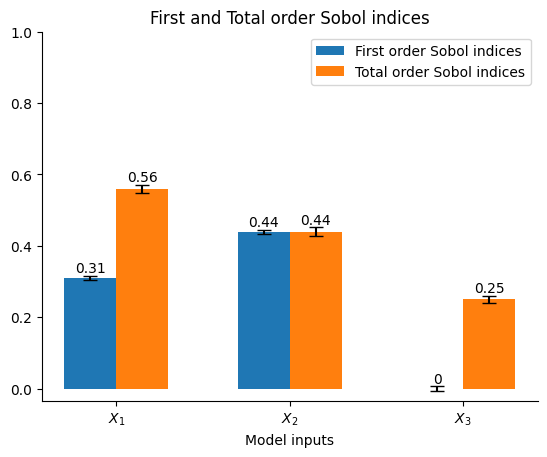

In [9]:
fig2, ax2 = plot_index_comparison(
    SA.first_order_indices[:, 0],
    SA.total_order_indices[:, 0],
    confidence_interval_1=SA.first_order_confidence_interval,
    confidence_interval_2=SA.total_order_confidence_interval,
    label_1="First order Sobol indices",
    label_2="Total order Sobol indices",
    plot_title="First and Total order Sobol indices",
    variable_names=["$X_1$", "$X_2$", "$X_3$"],
)